In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
all_data = pd.read_csv("all_data.csv")

In [3]:
# bay hariç herkes bayan

In [4]:
"""
bulgu:
    aynı sepetteki ürünlerin kargo ücretleri farklı

ship cost'u tahminlemek için regression model eğitilebilir (merge transactions ve products)
"""

"\nbulgu:\n    aynı sepetteki ürünlerin kargo ücretleri farklı\n\nship cost'u tahminlemek için regression model eğitilebilir (merge transactions ve products)\n"

In [5]:
#max, min ship_cost

In [6]:
#category_id göre ship cost avg +
#görselleştirme, hangi kategorini ship cost'u daha fazla vs +
#product_content_id, product_variant_id, 
#attribute_value, category_id
#en çok return edilen markalar ve categori +

In [3]:
all_data.columns

Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id',
       'product_variant_id', 'original_price', 'discounted_price', 'ship_cost',
       'coupon_id', 'coupon_discount', 'promotion_name',
       'promotion_award_value', 'is_wallet_trx', 'is_saved_card_trx',
       'is_returned', 'returnRate', 'total_claim', 'unresolved_claim',
       'unresolved_accepted_claim', 'unresolvedclaim_percentage',
       'defective_returnRate_x', 'defective_returnRate_y', 'review_rates_mean',
       'review_rates_min', 'review_rates_max', 'product_id_x',
       'product_name_x', 'brand_id_x', 'brand_name_x', 'gender_id_x',
       'gender_name_x', 'category_id_x', 'category_name_x', 'color_id_x',
       'color_name_x', 'supplier_color_name_x', 'attributet_name_x',
       'attribute_value_x', 'product_id_y', 'product_name_y', 'brand_id_y',
       'brand_name_y', 'gender_id_y', 'gender_name_y', 'category_id_y',
       'category_n

In [4]:
all_data = all_data.drop(['order_date','product_id_y', 'product_name_y', 'brand_id_y',
       'brand_name_y', 'gender_id_y', 'gender_name_y', 'category_id_y',
       'category_name_y', 'color_id_y', 'color_name_y',
       'supplier_color_name_y', 'attributet_name_y', 'attribute_value_y'], axis = 1)

In [8]:
all_data.is_saved_card_trx.value_counts() / all_data.is_saved_card_trx.count()

False    0.640824
True     0.359176
Name: is_saved_card_trx, dtype: float64

In [9]:
all_data_returned = all_data[all_data.is_returned == 1]

In [10]:
all_data_returned.groupby(["brand_name_x"])["is_returned"].value_counts().sort_values(ascending=False)[:10]

brand_name_x         is_returned
TRENDYOLMİLLA        1.0            600521
TRENDYOL MAN         1.0             63007
DeFacto              1.0             54572
Koton                1.0             42075
Happiness İst.       1.0             31489
Penti                1.0             27505
Olalook              1.0             21723
Mavi                 1.0             20442
Addax                1.0             19156
Trend Alaçatı Stili  1.0             17606
Name: is_returned, dtype: int64

In [11]:
all_data_returned.groupby(["category_name_x"])["is_returned"].value_counts().sort_values(ascending=False)[:30]

category_name_x             is_returned
Elbise                      1.0            249355
T-Shirt                     1.0            164151
Bluz                        1.0            105286
Jeans                       1.0             84907
Pantolon                    1.0             76477
Şort & Bermuda              1.0             75286
Gömlek                      1.0             54359
Etek                        1.0             32118
Bikini Üstü                 1.0             31238
Abiye & Mezuniyet Elbisesi  1.0             25676
Bikini Altı                 1.0             24835
Mayo                        1.0             24599
Eşofman Altı                1.0             23970
Tulum                       1.0             23034
Polo Yaka T-shirt           1.0             22035
Alt-Üst Takım               1.0             19072
Pijama Takımı               1.0             17414
Sütyen                      1.0             17042
Atlet                       1.0             14877
Tayt      

In [12]:
all_data.groupby("category_id_x")["ship_cost"].mean().sort_values(ascending = False)

category_id_x
2738    11.396667
2975    10.883238
582     10.583898
2753    10.483327
2774    10.382028
          ...    
936      4.058820
571      3.839013
2295     3.695419
942      3.597394
2313     3.481372
Name: ship_cost, Length: 187, dtype: float64

In [13]:
all_data.groupby("category_id_x")["ship_cost"]

In [14]:
all_data[all_data.category_id_x == 391]

,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,...,gender_id_x,gender_name_x,category_id_x,category_name_x,color_id_x,color_name_x,supplier_color_name_x,attributet_name_x,attribute_value_x,defective_returnRate
2844539,2137650,1,968,1038499545,672299755,36455124,64880742,129.00,38.70,2.153856,...,4295.0,Kadın / Kız,391,Eşarp,7012.0,Yeşil,Yesıl,BEDEN,Tek Ebat,0.002828
3082509,8905006,0,968,1049142387,687434385,36455081,64880628,159.00,47.70,9.400000,...,4295.0,Kadın / Kız,391,Eşarp,7009.0,Siyah,Sıyah,BEDEN,Tek Ebat,0.002828
5242518,12652985,0,1188,909248604,599908583,83819725,141069273,19.99,11.99,2.314271,...,4295.0,Kadın / Kız,391,Eşarp,7006.0,Mor,Çok Renkli-KR1,BEDEN,Tek Ebat,0.000978
5563670,38519799,1,1188,995153678,647883011,98287239,163545759,49.99,37.49,4.440000,...,4295.0,Kadın / Kız,391,Eşarp,7003.0,Lacivert,Lacivert-NV2,BEDEN,Tek Ebat,0.000978
5563671,38519799,1,1188,995153679,647883011,98287239,163545759,49.99,37.49,4.440000,...,4295.0,Kadın / Kız,391,Eşarp,7003.0,Lacivert,Lacivert-NV2,BEDEN,Tek Ebat,0.000978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828166,23829525,0,240284,1119689738,729030153,123277297,198943091,89.99,59.99,2.960000,...,4295.0,Kadın / Kız,391,Eşarp,7012.0,Yeşil,Soft Mint,BEDEN,100x100,0.000613
9828167,23829525,0,240284,1119689739,729030153,123277023,198942677,89.99,59.99,2.960000,...,4295.0,Kadın / Kız,391,Eşarp,7007.0,Pembe,Soft Pudra,BEDEN,100x100,0.000613
9828168,27809493,0,240284,1119873451,729131316,66419705,115670958,59.99,52.79,2.960000,...,4295.0,Kadın / Kız,391,Eşarp,7012.0,Yeşil,Mint,BEDEN,90x90,0.000613
9828169,27809493,0,240284,1119873450,729131316,66573866,115957099,89.99,59.99,2.960000,...,4295.0,Kadın / Kız,391,Eşarp,7013.0,Bordo,Bordo-Pudra,BEDEN,90x90,0.000613


In [15]:
all_data[all_data.category_id_x == 525]

,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,...,gender_id_x,gender_name_x,category_id_x,category_name_x,color_id_x,color_name_x,supplier_color_name_x,attributet_name_x,attribute_value_x,defective_returnRate
2,244942,1,4662,901366867,595806906,62212612,108756538,69.90,38.45,8.88,...,4294.0,Erkek,525,Eşofman Altı,7009.0,Siyah,Siyah,BEDEN,11 Yaş,0.003045
4,22708302,1,4662,901478384,595867189,89451047,149564473,129.90,84.44,8.88,...,4294.0,Erkek,525,Eşofman Altı,7009.0,Siyah,Siyah,BEDEN,XL,0.003045
8,61034026,0,4662,901523651,595891558,81823794,138362283,94.90,66.43,8.88,...,4294.0,Erkek,525,Eşofman Altı,6999.0,Gri,Gri,BEDEN,L,0.003045
10,11804612,0,4662,901566817,595914810,94116006,156820352,94.90,75.92,8.88,...,4294.0,Erkek,525,Eşofman Altı,7009.0,Siyah,Siyah,BEDEN,XL,0.003045
22,9681370,0,4662,902106335,596196194,81823794,138362279,94.90,75.92,8.88,...,4294.0,Erkek,525,Eşofman Altı,6999.0,Gri,Gri,BEDEN,XL,0.003045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832529,11860911,0,130820,917637295,604647727,97030543,161571703,76.62,29.79,4.44,...,4295.0,Kadın / Kız,525,Eşofman Altı,6999.0,Gri,GRİ,BEDEN,L,0.000808
9832545,33031591,0,130820,918534241,605136585,97030543,161580805,76.62,29.79,8.88,...,4295.0,Kadın / Kız,525,Eşofman Altı,6999.0,Gri,GRİ,BEDEN,S,0.000808
9832585,15392581,1,130820,921907056,607050686,97186945,161816856,54.16,29.79,8.88,...,4295.0,Kadın / Kız,525,Eşofman Altı,7009.0,Siyah,SİYAH,BEDEN,L,0.000808
9832618,39739490,1,130820,924547172,608538991,46792712,82428203,101.60,46.07,8.88,...,4295.0,Kadın / Kız,525,Eşofman Altı,7006.0,Mor,MOR,BEDEN,XL,0.000808


In [16]:
all_data.groupby("category_name_x")["ship_cost"].mean().sort_values(ascending = False)

category_name_x
Tesettür Tayt         11.396667
Büyük Beden Kaban     10.883238
Haşema                10.583898
Tesettür Pardesü      10.483327
Tesettür Kaban        10.382028
                        ...    
Bebek Body & Zıbın     4.058820
Slip                   3.839013
Hamile Tunik           3.695419
Astronot Tulum         3.597394
Hamile Pijama Üstü     3.481372
Name: ship_cost, Length: 187, dtype: float64

In [17]:
all_data_sample = all_data.sample(n= 30000, random_state = 0)

In [44]:
lol1 = all_data.groupby(["category_name_x"])["is_returned"].sum().sort_index()
lol1.sort_values(ascending = False)

category_name_x
Elbise              249355.0
T-Shirt             164151.0
Bluz                105286.0
Jeans                84907.0
Pantolon             76477.0
                      ...   
Hamile Çorabı            0.0
Tesettür Tayt            0.0
Tesettür Süveter         0.0
Tesettür Body            0.0
Hamile Tunik             0.0
Name: is_returned, Length: 187, dtype: float64

In [39]:
lol = all_data.groupby(["category_name_x"])["is_returned"].sum().sort_index() / all_data.groupby(["category_name_x"])["is_returned"].count().sort_index()

In [40]:
lol.sort_values(ascending= False)

category_name_x
Hamile Pançosu                1.000000
Abiye & Mezuniyet Elbisesi    0.439191
Büyük Beden Abiye Takım       0.379747
Büyük Beden Abiye Elbise      0.375246
Tesettür Abiye                0.364170
                                ...   
Tesettür Tayt                 0.000000
Hamile Etek                   0.000000
Tesettür Süveter              0.000000
Hamile Çorabı                 0.000000
Hamile Tunik                  0.000000
Name: is_returned, Length: 187, dtype: float64

In [42]:
all_data[all_data.category_name_x =="Hamile Pançosu"]

,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,...,gender_id_x,gender_name_x,category_id_x,category_name_x,color_id_x,color_name_x,supplier_color_name_x,attributet_name_x,attribute_value_x,defective_returnRate
9596558,812530,1,140957,1050681282,688335458,44335782,78523573,79.95,55.95,8.88,...,4295.0,Kadın / Kız,2271,Hamile Pançosu,7007.0,Pembe,PEMBE,BEDEN,S,0.002197


<AxesSubplot:xlabel='category_id_x', ylabel='ship_cost'>

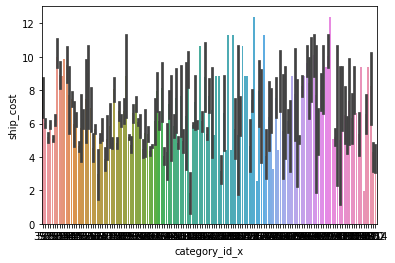

In [18]:
sns.barplot(x=is_returned, y=lol, data=all_data_sample)

In [19]:
all_data.ship_cost.max()

13.2

In [20]:
all_data.ship_cost.min()

0.1776